In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
df = pd.DataFrame(iris.data,columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

In [7]:
df['target name'] = iris.target
#df['target name'] = iris.target_names
df['target name'] = df['target name'].replace({0:'setosa',1:'versicolor',2:'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
sub_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
sub_df['target'] = iris.target
sub_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


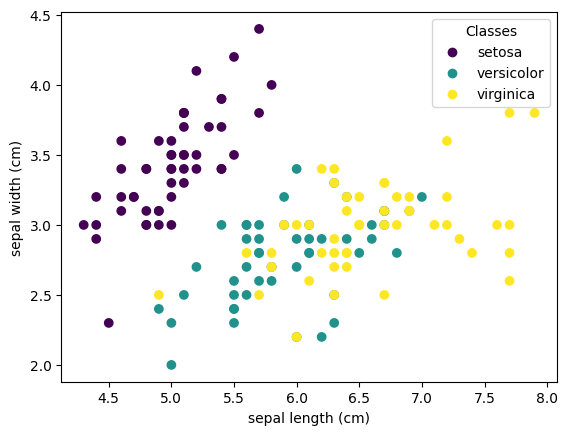

In [10]:
fig,ax = plt.subplots()
scatter = plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=iris.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
fig=ax.legend(scatter.legend_elements()[0],iris.target_names,title="Classes")

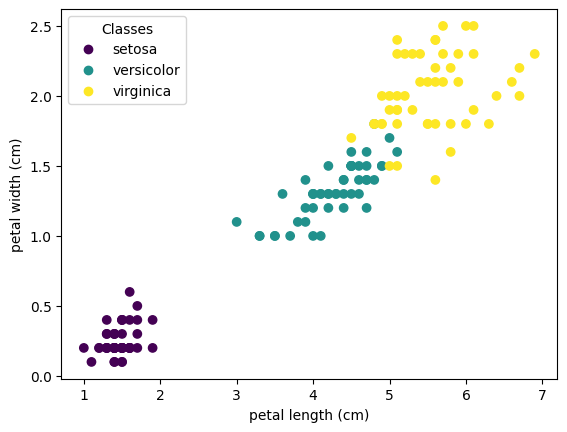

In [11]:
fig,ax = plt.subplots()
scatter = plt.scatter(df['petal length (cm)'],df['petal width (cm)'],c=iris.target)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
fig=ax.legend(scatter.legend_elements()[0],iris.target_names,title="Classes")

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sub_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']],sub_df['target'],test_size=0.3,random_state=101)

In [13]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(solver='lbfgs')
regressor.fit(x_train,y_train)

/home/harmeharsingh/Documents/Programs/Machine Learning/test/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
predictions = regressor.predict(x_test) 
regressor.score(x_test,y_test)

0.9777777777777777

In [15]:
print(x_test)
predictions

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
33                 5.5               4.2                1.4               0.2
16                 5.4               3.9                1.3               0.4
43                 5.0               3.5                1.6               0.6
129                7.2               3.0                5.8               1.6
50                 7.0               3.2                4.7               1.4
123                6.3               2.7                4.9               1.8
68                 6.2               2.2                4.5               1.5
53                 5.5               2.3                4.0               1.3
146                6.3               2.5                5.0               1.9
1                  4.9               3.0                1.4               0.2
147                6.5               3.0                5.2               2.0
32                 5.2               4.1                1.5     

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1])

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [18]:
cm = confusion_matrix(y_test,predictions)
cm

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  0, 12]])

Text(50.722222222222214, 0.5, 'Actual Values')

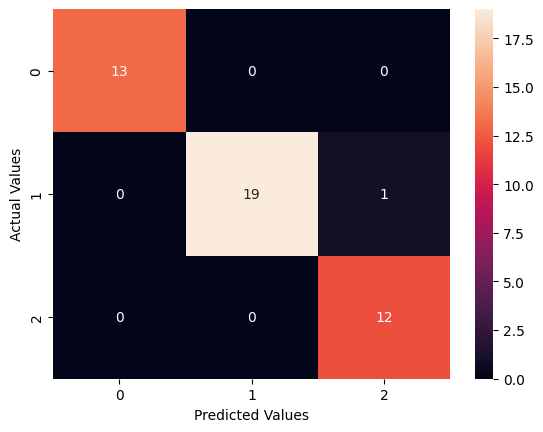

In [19]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [20]:
X = sub_df.iloc[:,0:2]
y2 = sub_df['target']

reg = LogisticRegression()

a_train,a_test,b_train,b_test=train_test_split(X,y2,test_size=0.3,random_state=101)
reg.fit(a_train,b_train)

LogisticRegression()

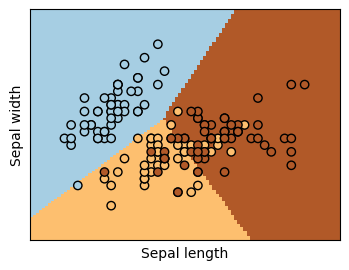

In [21]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    reg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y2, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

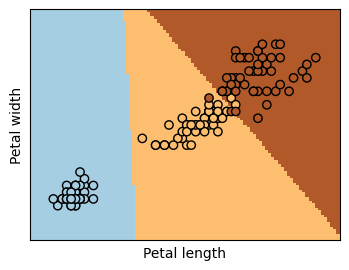

In [22]:
X = sub_df.iloc[:,2:4]
y3 = sub_df['target']

reggg = LogisticRegression()

a_train,a_test,b_train,b_test=train_test_split(X,y3,test_size=0.3,random_state=101)
reggg.fit(a_train,b_train)

fig, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    reggg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Petal length",
    ylabel="Petal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y2, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()